In [28]:
# =========================================
# 1) Import libraries
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [29]:
# =========================================
# 2) Load dataset
# =========================================
df = pd.read_csv("03_Clustering_Marketing.csv")  
df.shape

(15000, 40)

In [30]:
df.columns

Index(['gradyear', 'gender', 'age', 'NumberOffriends', 'basketball',
       'football', 'soccer', 'softball', 'volleyball', 'swimming',
       'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
       'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
       'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
       'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death',
       'drunk', 'drugs'],
      dtype='object')

In [31]:
df.isnull().sum()

gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

In [32]:
# =========================
# 1) Columns (40 features)
# =========================
cols_40 = [
    "gradyear", "gender", "age", "NumberOffriends",
    "basketball", "football", "soccer", "softball", "volleyball", "swimming",
    "cheerleading", "baseball", "tennis", "sports", "cute", "sex", "sexy", "hot",
    "kissed", "dance", "band", "marching", "music", "rock", "god", "church",
    "jesus", "bible", "hair", "dress", "blonde", "mall", "shopping", "clothes",
    "hollister", "abercrombie", "die", "death", "drunk", "drugs"
]
df = df[cols_40].copy()

# =========================
# 2) Clean numeric columns
# =========================
df["gradyear"] = pd.to_numeric(df["gradyear"], errors="coerce")
df["age"] = pd.to_numeric(df["age"], errors="coerce")

# Drop rows where conversion failed (NaN values)
df = df.dropna(subset=["gradyear", "age"])

# =========================
# 3) Encode gender
# =========================
df = pd.get_dummies(df, columns=["gender"], drop_first=True)

# =========================
# 4) Select ALL features
# =========================
features = [
    "gradyear", "age", "NumberOffriends",
    "basketball", "football", "soccer", "softball", "volleyball", "swimming",
    "cheerleading", "baseball", "tennis", "sports", "cute", "sex", "sexy", "hot",
    "kissed", "dance", "band", "marching", "music", "rock", "god", "church",
    "jesus", "bible", "hair", "dress", "blonde", "mall", "shopping", "clothes",
    "hollister", "abercrombie", "die", "death", "drunk", "drugs"
] + [col for col in df.columns if col.startswith("gender_")]

X = df[features]

# =========================
# 5) Scale
# =========================
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Cleaned and scaled features:", X.shape)
print("Number of features used:", X.shape[1])


Cleaned and scaled features: (12228, 40)
Number of features used: 40


In [33]:
df.isnull().sum()

gradyear           0
age                0
NumberOffriends    0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
gender_M           0
dtype: int64

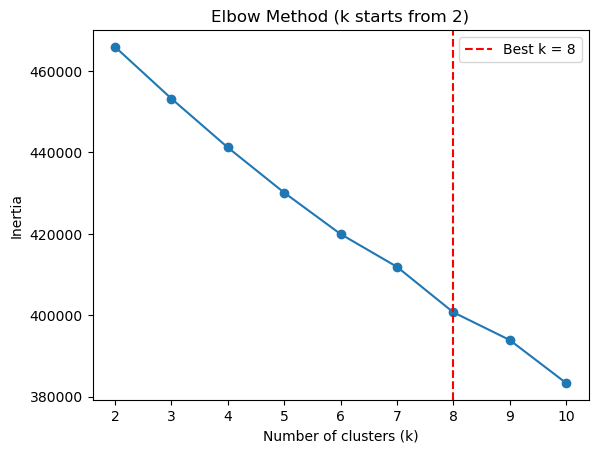

Optimal number of clusters (best k): 8


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# k must start from 2 (k=1 not useful for elbow)
K = np.arange(2, 11)   # 2..10

inertia = []
for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

inertia = np.array(inertia)

# First and second differences
d1 = np.diff(inertia)          # first derivative
d2 = np.diff(d1)               # second derivative

# elbow = point with largest "curvature" => max absolute second derivative
best_k = K[np.argmax(np.abs(d2)) + 1]  # +1 aligns index because d2 is shorter by 2

# Plot
plt.figure()
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method (k starts from 2)")

plt.axvline(best_k, color='red', linestyle='--', label=f"Best k = {best_k}")
plt.legend()
plt.show()

print("Optimal number of clusters (best k):", best_k)

Number of outliers: 448
Outlier rows:
        gradyear      age  NumberOffriends  basketball  football  soccer  \
13         2006   18.045               48           0         1       0   
64         2009   16.129               67           0         3       0   
95         2006    8.808                0           0         0       0   
100        2007  106.746               18           0         0       0   
120        2007   17.747               75           0         0       0   
...         ...      ...              ...         ...       ...     ...   
12065      2006   18.396               22           5         1       0   
12076      2007   17.722                0           0         0       0   
12190      2008   16.528                0           0         0       0   
12211      2007   17.284               45           0         1       0   
12213      2008   16.370               28           1         0       0   

       softball  volleyball  swimming  cheerleading  ...  cl

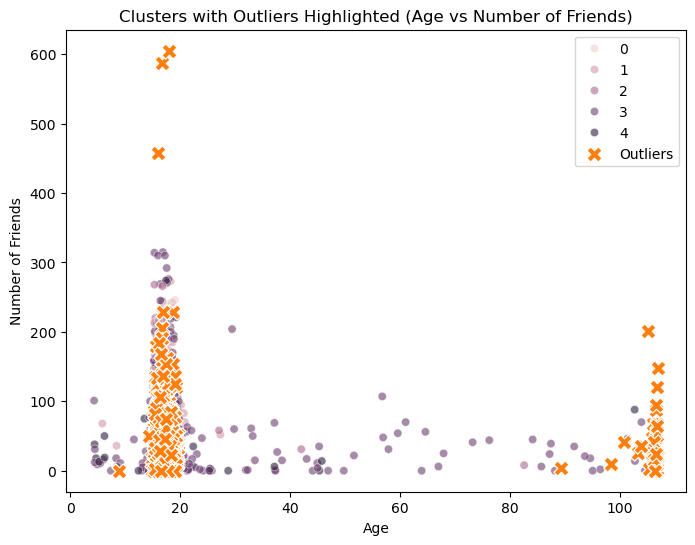

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# ✅ IMPORTANT: df هنا لازم يكون نفس df الذي بُني منه X و X_scaled (بعد dropna و get_dummies)
# إذا عندك df_clean استخدميه بدل df

# Run K-Means (example k=5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels (align by index)
df = df.reset_index(drop=True)
df["Cluster"] = clusters

# Compute distances to assigned centroids
centers_assigned = kmeans.cluster_centers_[clusters]              # center لكل نقطة
distances = np.linalg.norm(X_scaled - centers_assigned, axis=1)   # distance لكل نقطة

# Threshold: mean + 2*std
threshold = distances.mean() + 2 * distances.std()

# Flag outliers
df["Outlier"] = distances > threshold

print("Number of outliers:", df["Outlier"].sum())
print("Outlier rows:\n", df[df["Outlier"] == True])

# ---- Visualization (Age vs Number of Friends) ----
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x="age",
    y="NumberOffriends",
    hue="Cluster",
    alpha=0.6
)

# Highlight outliers
sns.scatterplot(
    data=df[df["Outlier"]],
    x="age",
    y="NumberOffriends",
    marker="X",
    s=120,
    label="Outliers"
)

plt.title("Clusters with Outliers Highlighted (Age vs Number of Friends)")
plt.xlabel("Age")
plt.ylabel("Number of Friends")
plt.legend()
plt.show()

In [36]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# ✅ تأكدي df مطابق لـ X_scaled (نفس الصفوف وبنفس الترتيب)
df = df.reset_index(drop=True)

# Threshold
threshold = distances.mean() + 2 * distances.std()

# Keep only non-outliers
mask = distances <= threshold

X_clean = X_scaled[mask]
df_clean = df.loc[mask].copy().reset_index(drop=True)

# Re-run KMeans with chosen k (example: k=4)
k = 4
kmeans_clean = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters_clean = kmeans_clean.fit_predict(X_clean)

# Add cluster labels
df_clean["Cluster"] = clusters_clean

# Inspect cluster profiles (means)
cluster_profiles = df_clean.groupby("Cluster").mean(numeric_only=True)

print("Cleaned data shape:", df_clean.shape)
print("Cluster profiles (mean values):")
print(cluster_profiles)

Cleaned data shape: (11780, 42)
Cluster profiles (mean values):
            gradyear        age  NumberOffriends  basketball  football  \
Cluster                                                                  
0        2007.596875  17.260930        30.637500    0.364063  0.403125   
1        2007.331132  18.071133        23.454717    0.283491  0.431132   
2        2007.802506  16.965571        49.322818    0.499136  0.468021   
3        2007.395765  17.871282        25.422308    0.143901  0.104981   

           soccer  softball  volleyball  swimming  cheerleading  ...  \
Cluster                                                          ...   
0        0.275000  0.212500    0.140625  0.218750      0.139063  ...   
1        0.183962  0.005660    0.025943  0.067453      0.003774  ...   
2        0.363872  0.385048    0.346154  0.261020      0.308124  ...   
3        0.152252  0.106174    0.083507  0.090367      0.046675  ...   

         shopping   clothes  hollister  abercrombie       

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


base_features_40 = [
    "gradyear", "age", "NumberOffriends",
    "basketball", "football", "soccer", "softball", "volleyball", "swimming",
    "cheerleading", "baseball", "tennis", "sports", "cute", "sex", "sexy", "hot",
    "kissed", "dance", "band", "marching", "music", "rock", "god", "church",
    "jesus", "bible", "hair", "dress", "blonde", "mall", "shopping", "clothes",
    "hollister", "abercrombie", "die", "death", "drunk", "drugs"
]
gender_cols = [c for c in df_clean.columns if c.startswith("gender_")]

features = base_features_40 + gender_cols

X = df_clean[features].copy()

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans
k = 2 
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Silhouette Score
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)
print("Number of features used:", X.shape[1])

Silhouette Score: 0.2945521275478322
Number of features used: 40


Explained Variance Ratio: [0.07438131 0.04364036]
Total Explained Variance (2 PCs): 0.11802167513319503


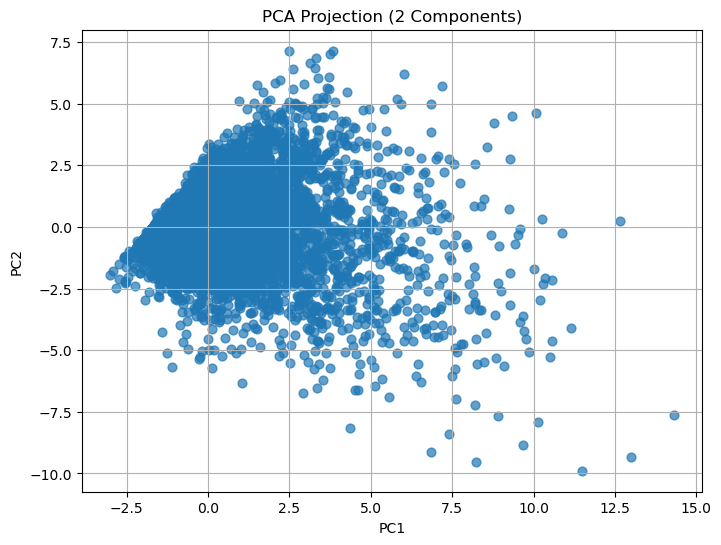

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance (2 PCs):", pca.explained_variance_ratio_.sum())

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=40, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (2 Components)")
plt.grid(True)
plt.show()